In [5]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
dataFrame = pd.read_csv('drive/My Drive/Colab Notebooks/sentimentAnalysis/AnalysisonNewDataSet/airline.csv')

In [7]:
dataFrame.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


In [0]:
dataFrame = pd.DataFrame({'content' : dataFrame['content'], 'recommended' : dataFrame['recommended']})

In [9]:
dataFrame.head()

,content,recommended
0,Outbound flight FRA/PRN A319. 2 hours 10 min f...,1
1,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,1
2,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,1
3,Adria serves this 100 min flight from Ljubljan...,1
4,WAW-SKJ Economy. No free snacks or drinks on t...,0


In [60]:
dataFrame.shape

(41396, 2)

In [10]:
dataFrame.describe()

,recommended
count,41396.000000
mean,0.533820
std,0.498861
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [11]:
print(dataFrame.content.isnull().sum())
print(dataFrame.recommended.isnull().sum())

0
0


(array([19298.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 22098.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

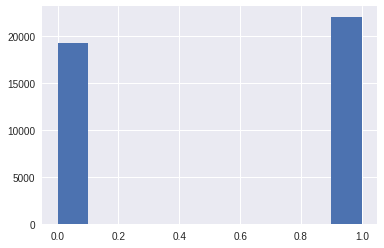

In [12]:
plt.hist(dataFrame['recommended'])

In [13]:
dataFrame['content'].count()

41396

# PreProcessing

In [0]:
from wordcloud import WordCloud,STOPWORDS

In [18]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
STOPWORDS_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# for not recommended flights, wordcloud :

neg_df = dataFrame[dataFrame['recommended']==0]
words = ' '.join(neg_df['content'])
cleaned_neg_words = ' '.join([word for word in words.split() if word not in STOPWORDS_nltk])

In [20]:
print(cleaned_neg_words[:30])
print(neg_df.shape)

WAW-SKJ Economy. No free snack
(19298, 2)


In [0]:
wordcloud = WordCloud(stopwords=STOPWORDS,width=3000,height=2500).generate(cleaned_neg_words)

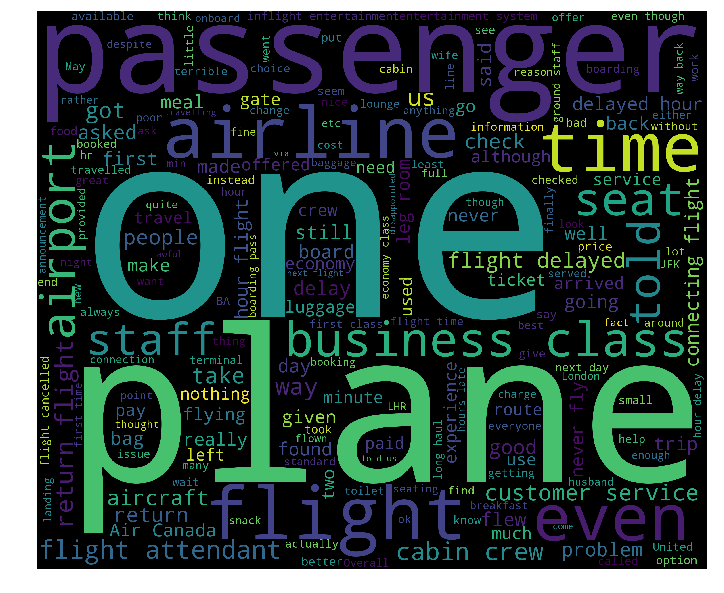

In [24]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
# for recommended flights, wordcloud :

pos_df = dataFrame[dataFrame['recommended']==1]
words = ' '.join(pos_df['content'])
cleaned_pos_words = ' '.join([word for word in words.split() if word not in STOPWORDS_nltk])

In [0]:
wordcloud = WordCloud(stopwords=STOPWORDS,width=3000,height=2500).generate(cleaned_pos_words)

In [27]:
pos_df.shape

(22098, 2)

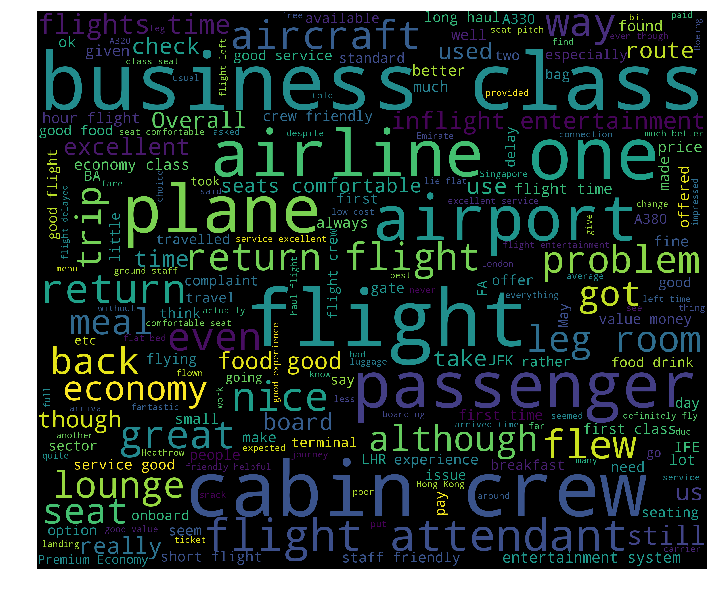

In [28]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [0]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [0]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [35]:
import re
def dataCleaning(text):
  text = str(text)
  text = re.sub(r' [0-9A-Z0-9]{1,} '," ",text)
  text = text.lower()
  text = expand_contractions(text)
  text = ' '.join(word for word in str(text).split(" ") if word not in STOPWORDS_nltk)
  text = re.sub(r"[^A-Za-z ]", " ", text)
  text = " ".join(lemmatizer.lemmatize(word) for word in text.split())
  text = re.sub(r" +", " ", text)
  text = text.split()
  return text

#testing 
dataCleaning("Hello, I have 2 ^ (caps) ")

['hello', 'cap']

# Embeddings (Google word embeddings)

In [46]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.6.0)


In [0]:
import gensim

In [48]:
!wget -P /files/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2018-12-20 10:27:37--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.20.189
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.20.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/files/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  44.6MB/s    in 37s     

2018-12-20 10:28:14 (42.8 MB/s) - ‘/files/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
from gensim.models.keyedvectors import KeyedVectors
wv_embeddings = KeyedVectors.load_word2vec_format(fname='/files/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [0]:
vocabulary = {} 
inverse_vocabulary = ['<unk>']

In [0]:
trainingDataFrame = dataFrame

In [55]:
for index,row in trainingDataFrame.iterrows():
  textToNumber = []
#   print(row)
  for word in dataCleaning(row['content']):
      if word in wv_embeddings.vocab:
          if word in vocabulary:
              textToNumber.append(vocabulary[word])
          else:
              vocabulary[word] = len(inverse_vocabulary)
              textToNumber.append(len(inverse_vocabulary))
              inverse_vocabulary.append(word)
  trainingDataFrame.set_value(index,'content',textToNumber) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [0]:
emb_dim = 300
embeddings = np.zeros((len(vocabulary) + 1, emb_dim))
embeddings[0] = 0

for word, index in vocabulary.items():
    if word in wv_embeddings.vocab:
        embeddings[index] = wv_embeddings.word_vec(word)
# len(vocabulary)

In [74]:
len(embeddings)

20695

In [76]:
len(vocabulary)

20694

In [56]:
trainingDataFrame.head()

,content,recommended
0,"[1, 2, 3, 4, 5, 6, 2, 7, 8, 9, 10, 11, 12, 8, ...",1
1,"[32, 33, 34, 35, 36, 17, 37, 19, 38, 39, 40, 4...",1
2,"[45, 46, 47, 2, 48, 49, 50, 51, 40, 52, 53, 20...",1
3,"[65, 6, 2, 66, 67, 68, 69, 70, 71, 72, 73, 74,...",1
4,"[97, 98, 99, 9, 8, 100, 101, 102, 49, 103, 104...",0


In [81]:
trainingDataFrame.tail()

,content,recommended
41391,"[108, 1443, 9530, 368, 938, 2, 414, 174, 910, ...",0
41392,"[474, 289, 700, 472, 43, 557, 356, 256, 73, 19...",1
41393,"[1410, 2023, 329, 1377, 2, 192, 636, 3557, 2, ...",0
41394,"[910, 41, 2, 1568, 81, 20, 196, 135, 291, 109,...",1
41395,"[455, 2525, 397, 882, 663, 719, 902, 1148, 300...",0


# Using LSTM

In [0]:
from sklearn.model_selection import train_test_split
import itertools
import datetime
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Lambda
import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from time import time
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [0]:
trainingDataFrameRef = trainingDataFrame.head(35000).copy()
testingDataFrameRef = trainingDataFrame.tail(6395).copy()

In [80]:
max_seq_length = trainingDataFrameRef.content.map(lambda x: len(x)).max()

validation_size = 3500
training_size = len(trainingDataFrameRef) - validation_size

X = trainingDataFrameRef['content']
Y = trainingDataFrameRef['recommended']

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

X_train = pad_sequences(X_train, maxlen=max_seq_length)
X_validation = pad_sequences(X_validation, maxlen=max_seq_length)

Y_train = Y_train.values
Y_validation = Y_validation.values

n_hidden = 25
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 3
print(len(embeddings))
print(max_seq_length)
model=Sequential()
model.add(Embedding(len(embeddings), emb_dim, weights=[embeddings], input_length=max_seq_length, trainable=False))
model.add(LSTM(n_hidden))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=n_epoch, validation_data=(X_validation, Y_validation))

20695
464
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 464, 300)          6208500   
_________________________________________________________________
lstm_6 (LSTM)                (None, 25)                32600     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total params: 6,241,126
Trainable params: 32,626
Non-trainable params: 6,208,500
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 31500 samples, validate on 3500 samples
Epoch 1/3
31500/31500 [==============================] - 283s 9ms/step - loss: 0.4193 - acc: 0.8160 - val_loss: 0.3679 - val_acc: 0.8509
Epoch 2/3
31500/31500 [==============================] - 283s 9ms/step - loss: 0.3490 - acc: 0.8590 - val_loss: 0.3505 - val_acc: 0.8600
Epoch 3/3
31500/31500 [==============================] - 282s 9ms/step - loss: 0.3312 - acc: 0.8658 - val_loss: 0.3624 - val_acc: 0.8574


In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 464, 300)          6208500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                32600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 6,241,126
Trainable params: 32,626
Non-trainable params: 6,208,500
_________________________________________________________________


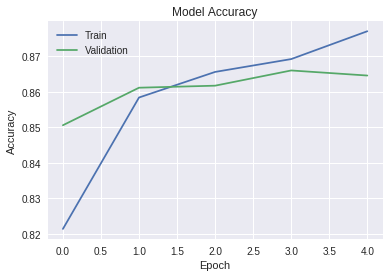

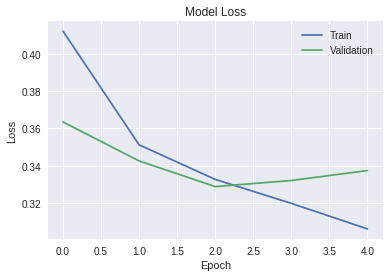

In [72]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [0]:
x_test = pad_sequences(testingDataFrameRef['content'], maxlen=max_seq_length)

In [0]:
outputs = model.predict(x_test,verbose=0)

In [0]:
outputs[outputs>.5] = 1
outputs[outputs<.5] = 0

In [86]:
outputs.shape

(6395, 1)

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [0]:
y_actual = np.array(testingDataFrameRef['recommended'])

In [89]:
accuracy_score(y_actual,outputs)

0.872556684910086

In [90]:
f1_score(y_actual,outputs)

0.85793968973331

# Checking

In [0]:
comment = "food was ok"

In [0]:
t2n = []
for word in dataCleaning(comment):  
  if word in vocabulary:
    t2n.append(vocabulary[word])
         
# t2n = pd.Series(t2n)              
t2n = pad_sequences([t2n], maxlen=max_seq_length)

In [115]:
output = model.predict(t2n,verbose=0)
print(output)
result = 'Positive' if output[0][0]>0.5 else 'Negative'
result

[[0.5096778]]


'Positive'